# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Aditia Prabowo
- **Email:** aditiaprabowo3@gmail.com
- **ID Dicoding:** aditia_prabowo_10

## Menentukan Pertanyaan Bisnis

- Kapan waktu tersibuk dalam sehari untuk penyewaan sepeda?
- Apakah cuaca memengaruhi jumlah pengguna sepeda?
- Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?
- Apakah ada perbedaan pola penyewaan sepeda antara hari kerja, akhir pekan, dan hari libur nasional?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### **Load tabel day**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Load tabel hr**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving hour.csv to hour.csv


In [5]:
hr_df = pd.read_csv("hour.csv")
hr_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

### **Menilai day_df**

1.Mengecek tipe data day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Mengecek ada missing values

In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


3. Mengecek duplicate data

In [8]:
print("Jumlah duplicate data: ", day_df.duplicated().sum())

Jumlah duplicate data:  0


4. Mengecek apakah terdapat keanehan pada nilai dalam statistik

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Menilai hr_df**

1. Mengecek tipe data hr_df

In [10]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Mengecek ada missing values

In [11]:
hr_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


3. Mengecek apakah ada duplicate data

In [12]:
print("Jumlah duplikasi data: ", hr_df.duplicated().sum())

Jumlah duplikasi data:  0


4. Mengecek apakah terdapat keanehan pada nilai statistiknya

In [13]:
hr_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Menghapus tabel yang tidak diperlukan

In [14]:
del day_df

Hapus Kolom yang Tidak Dibutuhkan

In [15]:
cols_to_drop = ['instant']

for col in cols_to_drop:
    if col in hr_df.columns:
        hr_df.drop(columns=[col], inplace=True)

Merubah type data dteday menjadi datetime

In [16]:
hr_df['dteday'] = pd.to_datetime(hr_df['dteday'])
print(hr_df.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df dan hr_df

Melihat rata-rata jumlah sewa sepeda per jam


In [18]:
hourly_usage = hr_df.groupby('hr')['cnt'].mean().reset_index()
hourly_usage

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


 rata-rata penyewaan berdasarkan kondisi cuaca.

In [19]:
weather_usage = hr_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_usage

,weathersit,cnt
0,1,204.869272
1,2,175.165493
2,3,111.579281
3,4,74.333333


Jam dengan jumlah sewa tertinggi dan terendah

In [20]:
min_rent_hour = hr_df.loc[hr_df['cnt'].idxmin(), ['hr', 'cnt']]
min_rent_hour

,4
hr,4
cnt,1


In [21]:
max_rent_hour = hr_df.loc[hr_df['cnt'].idxmax(), ['hr', 'cnt']]
max_rent_hour


,14773
hr,18
cnt,977


Rata-rata Penyewaan Sepeda di Weekday, Weekend, Holiday

In [22]:
day_type_usage = hr_df.groupby(['workingday', 'holiday'])['cnt'].mean().reset_index()

day_type_usage['day_type'] = day_type_usage.apply(
    lambda x: 'Holiday' if x['holiday'] == 1 else ('Weekend' if x['workingday'] == 0 else 'Weekday'),
    axis=1
)

print(day_type_usage)

   workingday  holiday         cnt day_type
0           0        0  183.852014  Weekend
1           0        1  156.870000  Holiday
2           1        0  193.207754  Weekday


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu tersibuk dalam sehari untuk penyewaan sepeda?

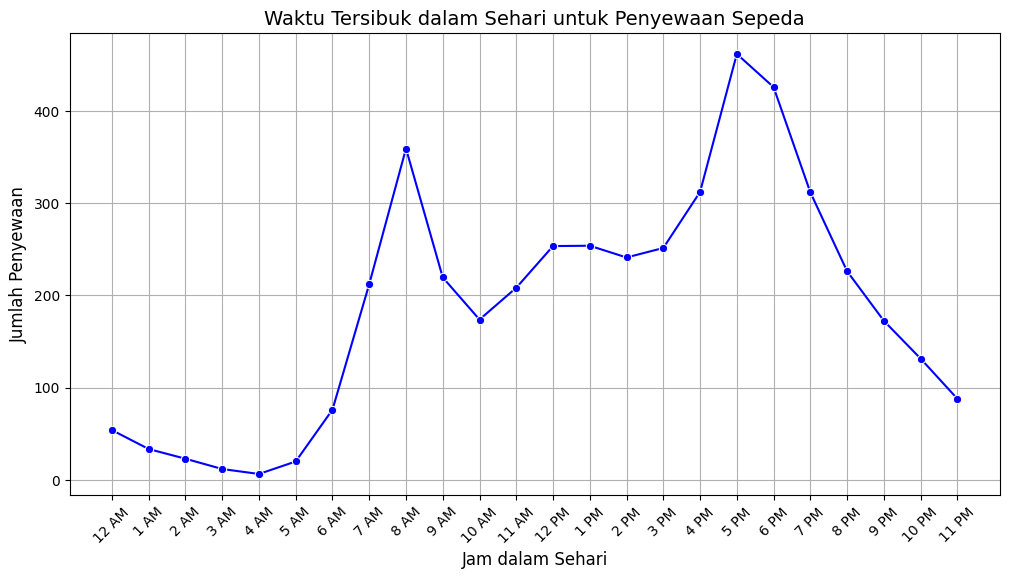

In [23]:
hourly_usage = hr_df.groupby('hr')['cnt'].mean().reset_index()

hour_labels = {0: "12 AM", 1: "1 AM", 2: "2 AM", 3: "3 AM", 4: "4 AM", 5: "5 AM",
               6: "6 AM", 7: "7 AM", 8: "8 AM", 9: "9 AM", 10: "10 AM", 11: "11 AM",
               12: "12 PM", 13: "1 PM", 14: "2 PM", 15: "3 PM", 16: "4 PM", 17: "5 PM",
               18: "6 PM", 19: "7 PM", 20: "8 PM", 21: "9 PM", 22: "10 PM", 23: "11 PM"}

hourly_usage['hour_label'] = hourly_usage['hr'].map(hour_labels)

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_usage, x='hour_label', y='cnt', marker='o', color='b')

plt.title("Waktu Tersibuk dalam Sehari untuk Penyewaan Sepeda", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Berdasarkan visualisasi di atas menggunakan line plot, dapat disimpulkan bahwa:

- Jam sibuk terjadi pada pagi dan sore hari, dengan puncak penyewaan terjadi sekitar jam 8 AM dan 5-6 PM
- Penyewaan sepeda paling rendah terjadi pada dini hari, terutama antara jam 12 AM - 5 AM
- Setelah jam 6 PM, jumlah penyewaan sepeda terus menurun sampai jam 4 AM

### Pertanyaan 2: Apakah Cuaca Mempengaruhi Jumlah Pengguna Sepeda?

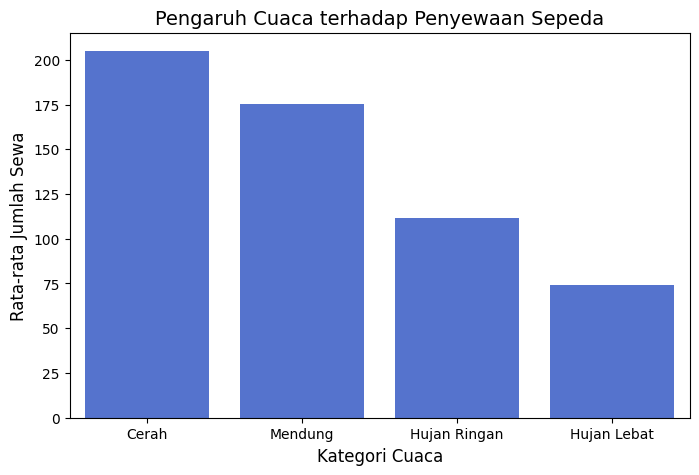

In [24]:
weather_usage = hr_df.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=weather_usage, x='weathersit', y='cnt', color="royalblue")

plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kategori Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Sewa", fontsize=12)
plt.xticks([0, 1, 2, 3], ['Cerah', 'Mendung', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

Berdasarkan visualisasi di atas menggunakan barplot, dapat disimpulkan bahwa:
- Cuaca cerah memiliki jumlah penyewaan sepeda tertinggi dibandingkan kategori cuaca lainnya
- Jumlah penyewaan menurun saat cuaca mendung tetapi tidak terlalu drastis
- Saat hujan ringan, jumlah penyewaan sepeda berkurang secara signifikan dibandingkan kondisi cerah atau mendung
- Hujan lebat memiliki jumlah penyewaan sepeda terendah

### Pertanyaan 3: Pada Jam Berapa Penyewaan Sepeda Paling Tinggi dan Paling Rendah?

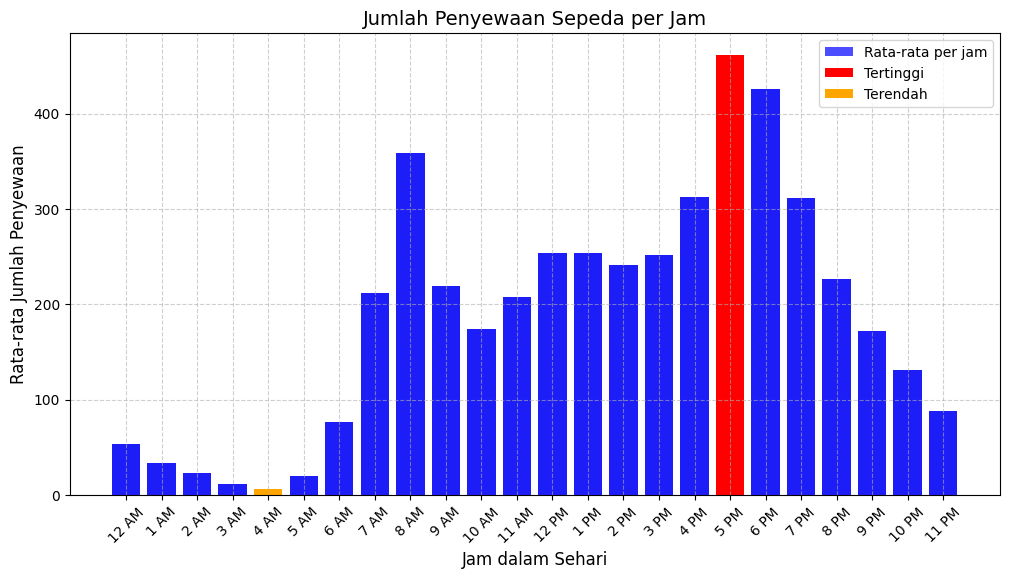

In [25]:

hourly_usage = hr_df.groupby('hr')['cnt'].mean().reset_index()

hour_labels = {0: "12 AM", 1: "1 AM", 2: "2 AM", 3: "3 AM", 4: "4 AM", 5: "5 AM",
               6: "6 AM", 7: "7 AM", 8: "8 AM", 9: "9 AM", 10: "10 AM", 11: "11 AM",
               12: "12 PM", 13: "1 PM", 14: "2 PM", 15: "3 PM", 16: "4 PM", 17: "5 PM",
               18: "6 PM", 19: "7 PM", 20: "8 PM", 21: "9 PM", 22: "10 PM", 23: "11 PM"}

hourly_usage['hour_label'] = hourly_usage['hr'].map(hour_labels)

most_busy_hour = hourly_usage.loc[hourly_usage['cnt'].idxmax()]
least_busy_hour = hourly_usage.loc[hourly_usage['cnt'].idxmin()]

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_usage, x='hour_label', y='cnt', color='blue', alpha=0.7)

plt.bar(hourly_usage['hour_label'], hourly_usage['cnt'], color='blue', alpha=0.7, label="Rata-rata per jam")
plt.bar(most_busy_hour['hour_label'], most_busy_hour['cnt'], color='red', label="Tertinggi")
plt.bar(least_busy_hour['hour_label'], least_busy_hour['cnt'], color='orange', label="Terendah")

plt.title("Jumlah Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Berdasarkan visualisasi di atas menggunakan barplot, dapat disimpulkan bahwa:
- Puncak penyewaan sepeda terjadi pada jam 5 PM, yang ditandai dengan warna merah
- Jumlah penyewaan paling rendah terjadi pada jam 4 AM, yang ditandai dengan warna orange
- Dan yang terakhir yaitu rata-rata penyewaan per jam ditampilkan dalam warna biru

### Pertanyaan 4: Apakah ada perbedaan pola penyewaan sepeda antara hari kerja, akhir pekan, dan hari libur nasional?

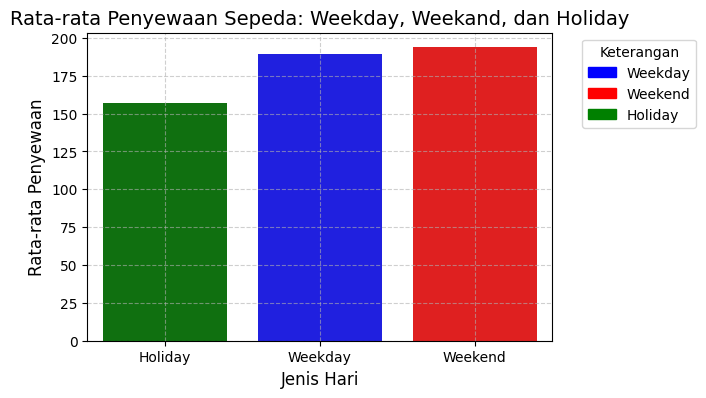

In [27]:
hr_df['day_type'] = np.where(hr_df['holiday'] == 1, 'Holiday',
                             np.where(hr_df['weekday'] < 5, 'Weekday', 'Weekend'))

day_type_usage = hr_df.groupby('day_type', as_index=False)['cnt'].mean()

palette_colors = {'Weekday': 'blue', 'Weekend': 'red', 'Holiday': 'green'}

plt.figure(figsize=(6, 4))
sns.barplot(data=day_type_usage, x='day_type', y='cnt', hue='day_type', palette=palette_colors, legend=False)

plt.title("Rata-rata Penyewaan Sepeda: Weekday, Weekand, dan Holiday", fontsize=14)
plt.xlabel("Jenis Hari", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

labels = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette_colors.values()]
plt.legend(labels, palette_colors.keys(), title="Keterangan", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Berdasarkan visualisasi di atas menggunakan barplot, dapat disimpulkan bahwa:
- Weekend memiliki rata-rata penyewaan sepeda tertinggi, yang ditandai dengan warna merah
- Weekday memiliki rata-rata penyewaan yang lebih rendah dibandingkan weekend, tetapi masih lebih tinggi dibandingkan holiday dengan ditandai waran biru
- Holiday memiliki rata-rata penyewaan sepeda paling rendah, yang ditandai dengan warna hijau

## Conclusion

- Conclution pertanyaan 1 : Dapat dilihat dengan jelas line plot, pola penyewaan sepeda menunjukkan bahwa aktivitas penyewaan meningkat pada jam 8 AM dan 5-6 PM, yang kemungkinan besar bertepatan dengan jam sibuk orang berangkat dan pulang kerja atau sekolah. Sebaliknya, jumlah penyewaan sepeda paling rendah terjadi pada dini hari, terutama antara 12 AM hingga 5 AM, ketika sebagian besar orang beristirahat. Setelah 6 PM, jumlah penyewaan terus menurun hingga mencapai titik terendah sekitar 4 AM, sebelum kembali meningkat menjelang pagi. Pola ini mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi harian dibandingkan untuk aktivitas malam

- Conclution pertanyaan 2 : Dengan visualisasi menggunakan barplot, dapat disimpulkan bahwa jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah, sementara jumlah penyewaan mulai menurun ketika cuaca mendung, meskipun penurunannya tidak terlalu drastis. Saat hujan ringan, terjadi penurunan signifikan dalam jumlah penyewaan dibandingkan kondisi cerah atau mendung. Adapun kondisi hujan lebat menunjukkan jumlah penyewaan sepeda yang paling rendah, yang kemungkinan besar disebabkan oleh kenyamanan dan keamanan bersepeda yang berkurang dalam kondisi cuaca ekstrem.

- Conclution pertanyaan 3 : Berdasarkan visualisasi menggunakan barplot, dapat disimpulkan bahwa puncak penyewaan sepeda terjadi pada jam 5 PM, yang ditandai dengan warna merah, menunjukkan tingginya aktivitas penyewaan pada jam tersebut. Sebaliknya, jumlah penyewaan paling rendah terjadi pada jam 4 AM, yang ditandai dengan warna oranye, mengindikasikan minimnya aktivitas penyewaan pada dini hari. Selain itu, rata-rata penyewaan per jam ditampilkan dalam warna biru, memberikan gambaran umum tentang tren penyewaan sepanjang hari.

- Conclution pertanyaan 4 : Weekend memiliki rata-rata penyewaan sepeda tertinggi, yang ditandai dengan warna merah. Sementara itu, pada Weekday memiliki rata-rata penyewaan yang lebih rendah dibandingkan weekend, tetapi masih lebih tinggi dibandingkan holiday dengan ditandai waran biru, dan Holiday memiliki rata-rata penyewaan sepeda paling rendah, yang ditandai dengan warna hijau